# Webscrapping using BeautifulSoup

At this module we will learn on how do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to colleting the data from internet. At this particular module, we will try to scrap ethereum sales from www.coingecko.com. To do this we will only use a couple default library from python and BeautifulSoup. 


## Background

At this project we try to scrap Ethereum Sales Volume Data from CoinGecko. CoinGecko is the world’s largest independent cryptocurrency data aggregator with over 6,000 different cryptoassets tracked across more than 400 exchanges worldwide. We will try to scrap this sites for educational purpose only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation. Let's say we have task to make a forecast on Ethereum sales. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public.

We will scrap 2 points from this sites. One is date to get information day to day from ethereum and the other one is volume. volume is the number of active trades that occur on a particular coin.

## Requesting the Data and Creating a BeautifulSoup
Let's begin with requesting the web from the site with get method.

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the request.get, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":0,"applicationTime":213,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).loader_config={xpid:"VQ4EVVBUCBAIV1VbAgYGUQ==",licenseKey:"'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects.

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


# Finding the right key to scrap the data & Extracting the right information

<br>
<br>
Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

<img src="asset/image1.jpg">

<br>
<br>
From inspect element we know that we need to find the line `table` with `class table table-striped text-sm text-lg-normal`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get.

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. 

In [5]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


As we can see from the line we just extract, we get all the content we needed. As for what is table, The `table` tag defines a table or a section in an HTML document. It is easily styled by using the class or id attribute, Any sort of content can be put inside the `table` tag. 
    
The `find()` function can help you to get you the part of the html code that you needed. While most of the html is contained in `table` you can differsiate them with help of `attrs=`, you can insert anything that in the `table` a the attrs to help you find the part you needed. 
    
Now I will introduce you to other useful function from beautiful soup, that's `find_all`. While the `find` fuction method is used for finding out the **first tag** with the specified name or id and returning an object of type bs4. The find_all method is used for finding out **all tags** with the specified tag name or id and returning them as a list of type bs4.


In [6]:
row = table.find_all('tr')

In [7]:
row_length= len(row)

<b>Get `header` column<b>


In [8]:
row[0].find_all('th', attrs={'class':'text-center'})

[<th class="text-center">Date</th>,
 <th class="text-center">Market Cap</th>,
 <th class="text-center">Volume</th>,
 <th class="text-center">Open</th>,
 <th class="text-center">Close</th>]

<b>Get value `date` in first row<b>

In [9]:
row[1].find_all('th', attrs ={'class':'font-semibold text-center', 'scope':'row'})[0].text

'2021-06-30'

<b>Get value `Market Cap` in first row<b>

In [10]:
row[1].find_all('td', attrs ={'class':'text-center'})[0].text

'\n$253,607,549,372\n'

<b>Get value `Volume` in first row<b>

In [11]:
row[1].find_all('td', attrs ={'class':'text-center'})[1].text

'\n$27,149,143,847\n'

<b>Get value `Open` in first row<b>

In [12]:
row[1].find_all('td', attrs ={'class':'text-center'})[2].text

'\n$2,169.40\n'

<b>Get value `Close` in first row<b>

In [13]:
row[1].find_all('td', attrs ={'class':'text-center'})[3].text

'\nN/A\n'

Okay, okay now we know the length of our data, now here what we will do for the looping process.

Here what the looping do to scrap the information:

- First we need to establish a placeholder to receive the information that we scrap.
- We named our placeholder temp and it's a list.
- Then we will make a loop from one until the the length of the table row,
- which we will find all cell of the column one and two which contain period and the inflation rate.
- Then we will append it to our tuple that we prepared before,
- every one iteration we will scrap one line of the table.

In [14]:
temp = [] #initiating a tuple

for i in range(1, row_length):
    
    #get date 
    Date = row[i].find_all('th', attrs ={'class':'font-semibold text-center', 'scope':'row'})[0].text
    Date = Date.strip()
    
    #get market cap
    Market_cap = row[i].find_all('td', attrs ={'class':'text-center'})[0].text
    Market_cap = Market_cap.strip()
    
    #get volume
    Volume = row[i].find_all('td', attrs ={'class':'text-center'})[1].text
    Volume= Volume.strip()
    
    #get open
    Open = row[i].find_all('td', attrs ={'class':'text-center'})[2].text
    Open = Open.strip()
    
    #get close
    Close = row[i].find_all('td', attrs ={'class':'text-center'})[3].text
    Close = Close.strip()
    
    #scrapping process
    temp.append((Date, Market_cap, Volume, Open, Close))
temp

-17', '$41,136,175,614', '$13,298,202,038', '$365.13', '$388.80'),
 ('2020-09-16', '$41,019,180,032', '$12,209,389,923', '$364.69', '$365.13'),
 ('2020-09-15', '$42,353,184,459', '$14,124,838,468', '$376.39', '$364.69'),
 ('2020-09-14', '$41,170,490,544', '$13,172,306,579', '$365.70', '$376.39'),
 ('2020-09-13', '$43,393,172,174', '$11,465,259,433', '$387.72', '$365.70'),
 ('2020-09-12', '$42,135,842,526', '$12,937,594,459', '$373.91', '$387.72'),
 ('2020-09-11', '$41,300,327,191', '$74,747,424,441', '$367.64', '$373.91'),
 ('2020-09-10', '$39,580,368,571', '$13,120,851,004', '$351.23', '$367.64'),
 ('2020-09-09', '$37,835,807,856', '$14,799,132,843', '$337.85', '$351.23'),
 ('2020-09-08', '$39,639,961,273', '$14,769,191,934', '$351.88', '$337.85'),
 ('2020-09-07', '$39,710,363,028', '$21,920,007,829', '$352.99', '$351.88'),
 ('2020-09-06', '$37,655,618,254', '$22,254,663,654', '$334.47', '$352.99'),
 ('2020-09-05', '$43,627,087,090', '$10,260,946,593', '$387.90', '$334.47'),
 ('2020-0

That the result we get, At this point we can input it to a pandas' DataFrame and do usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our list we can use `::-1` to do that.

In [15]:
temp = temp[::-1]
temp

020-11-13', '$52,548,309,254', '$11,096,201,853', '$462.21', '$475.97'),
 ('2020-11-14', '$53,963,588,841', '$10,814,357,418', '$475.97', '$462.72'),
 ('2020-11-15', '$52,476,765,553', '$9,774,490,046', '$462.72', '$449.21'),
 ('2020-11-16', '$50,978,678,613', '$8,946,780,761', '$449.21', '$461.37'),
 ('2020-11-17', '$52,356,872,782', '$9,874,800,384', '$461.37', '$482.20'),
 ('2020-11-18', '$54,716,609,290', '$12,534,266,982', '$482.20', '$479.44'),
 ('2020-11-19', '$54,435,713,128', '$15,390,748,757', '$479.44', '$471.32'),
 ('2020-11-20', '$53,447,508,889', '$10,960,245,344', '$471.32', '$508.79'),
 ('2020-11-21', '$57,875,755,338', '$15,567,496,837', '$508.79', '$548.84'),
 ('2020-11-22', '$62,062,910,159', '$17,270,632,325', '$548.84', '$560.51'),
 ('2020-11-23', '$64,219,272,617', '$20,803,203,331', '$560.51', '$608.27'),
 ('2020-11-24', '$68,705,033,456', '$22,868,894,446', '$608.27', '$602.67'),
 ('2020-11-25', '$68,461,935,306', '$19,964,356,486', '$602.67', '$568.28'),
 ('202

Then after we fix our list a bit, as usual we will input it to pandas' dataframe.
<br>
<br>

# Creating Pandas Dataframe and Data Wrangling¶

In [16]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Market_Cap', 'Volume', 'Open', 'Close'))
df.head()

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,"$14,097,451,632","$7,103,187,151",$129.19,$130.48
1,2020-01-02,"$14,230,588,104","$6,623,732,041",$130.48,$127.05
2,2020-01-03,"$13,859,793,330","$6,497,297,884",$127.05,$133.70
3,2020-01-04,"$14,613,194,776","$9,655,245,100",$133.70,$134.14
4,2020-01-05,"$14,636,213,160","$6,958,393,690",$134.14,$135.01


<!--  -->

Let's check our dataframe data types to see if our data is useable.

In [17]:
df.dtypes

Date          object
Market_Cap    object
Volume        object
Open          object
Close         object
dtype: object

 we need to change the "," to "" and remove symbol ($). To do this we can use the help of `str.replace()`. Then lastly let's fix our period data type.

In [18]:
df['Market_Cap'] = df['Market_Cap'].str.replace(",","")
df['Market_Cap'] = df['Market_Cap'].str.replace("$","")


df['Volume'] = df['Volume'].str.replace(",","")
df['Volume'] = df['Volume'].str.replace("$","")


df['Open'] = df['Open'].str.replace(",","")
df['Open'] = df['Open'].str.replace("$","")


df['Close'] = df['Close'].str.replace(",","")
df['Close'] = df['Close'].str.replace("$","")


<ipython-input-18-478b954cbe7c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Market_Cap'] = df['Market_Cap'].str.replace("$","")
<ipython-input-18-478b954cbe7c>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace("$","")
<ipython-input-18-478b954cbe7c>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Open'] = df['Open'].str.replace("$","")
<ipython-input-18-478b954cbe7c>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addi

In [19]:
df.head(5)

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,14097451632,7103187151,129.19,130.48
1,2020-01-02,14230588104,6623732041,130.48,127.05
2,2020-01-03,13859793330,6497297884,127.05,133.70
3,2020-01-04,14613194776,9655245100,133.70,134.14
4,2020-01-05,14636213160,6958393690,134.14,135.01


And then, we can clean the data or save it to csv let's do a bit cleaning so we can do a bit of visualisation. We will change :
- Date to datetime 
- Market_Cap to float
- Volume to float
- Open to float
- Close to float



In [20]:
df.loc[(df['Close'] == 'N/A', 'Close')] = 0

In [21]:
df['Date'] = df['Date'].astype('datetime64')

df['Market_Cap'] = df['Market_Cap'].astype('float64')

df['Volume'] = df['Volume'].astype('float64')

df['Open'] = df['Open'].astype('float64')

df['Close'] = df['Close'].astype('float64')



In [22]:
df.dtypes

Date          datetime64[ns]
Market_Cap           float64
Volume               float64
Open                 float64
Close                float64
dtype: object

In [23]:
df.head(5)


,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,1.409745e+10,7.103187e+09,129.19,130.48
1,2020-01-02,1.423059e+10,6.623732e+09,130.48,127.05
2,2020-01-03,1.385979e+10,6.497298e+09,127.05,133.70
3,2020-01-04,1.461319e+10,9.655245e+09,133.70,134.14
4,2020-01-05,1.463621e+10,6.958394e+09,134.14,135.01


<!--  -->

To make our plot behave like we want, we need to set our index of our dataframe to our `Date` coloumn. We can use `set_index()`

In [24]:
df = df.set_index('Date')

<!--  -->

And done, We can do our simple visualisation to put the cherry on top.

In [25]:
df_volume = df.drop(['Market_Cap','Open','Close'], axis=1)

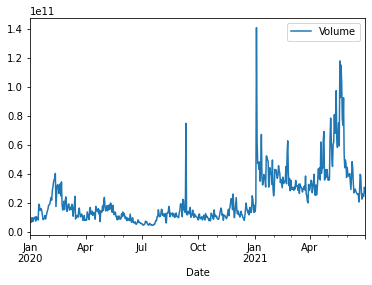

In [27]:
df_volume.plot()

Analysis :

- In general the trend of ethereum volume has increased.
- The highest increase occurred in the period of May and June 2021
- seeing the pattern of ethereum volume is very profitable if we want to invest here

In [28]:
df_market_cap = df.drop(['Volume','Open','Close'], axis=1)

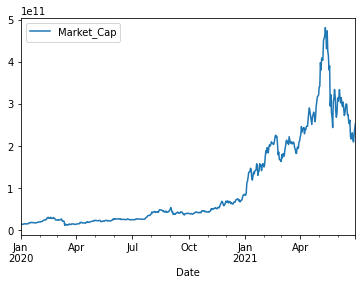

In [29]:
df_market_cap.plot()

The market cap or market cap on a type of coin is metric information that includes the number of coins available and the price of the coin. In the world of crypto assets, the market cap is an excellent indicator of coin stability.

based on market cap `ethereum` above:
- the pattern of the market cap value tends to increase
- the market cap value rose in May and then dropped slightly and this is a sign that it is in the correction stage of the pattern before it can rise drastically
- the pattern on the market cap is positively correlated with volume

We already finish our web scrapping job, now we have all the data we need and we can move on to the next part of the project using pandas usual. In conclusion when you don't have a direct access to a data from a website you can always do the scrapping method. There is a couple library that can do same task like scrapy that can build bot to automaticly crawl data, but we choose beautiful soup since it's more beginner friendly and a helpful utility that allows a programmer to get specific elements out of a webpage (for example, a list of images).


<!--  -->
